# Activation functions

On this notebook we will take a look at some of the different activation functions present in keras backend and will compare them.

## The data
We will use our old friend MNIST for its simplicity. 

<font color=red><b>Load the dataset and preprocess it. 
</font>

In [1]:
import os, time
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])



y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

## Model Architecture
Let's build a very simple model on this example. It will consist on:
- A dense layer with 512 units, relu activated
- A dense layer with the number of classes as  the amount of units, softmax activated
- Use RMSprop as the optimizer and categorical crossentropy as the loss function. Add accuracy to the metrics

<font color=red><b> Build the model
</font>

In [3]:
num_classes = 10
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


<font color=red><b> Train the model for 5 epochs and with a batch size of 128. Use the test data as validation and evaluate the model. Keep the information in a history variable
</font>

In [4]:
batch_size = 128
epochs = 5
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2612 - accuracy: 0.9243 - val_loss: 0.1304 - val_accuracy: 0.9604
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1054 - accuracy: 0.9691 - val_loss: 0.0856 - val_accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.0755 - val_accuracy: 0.9762
Epoch 4/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0657 - val_accuracy: 0.9811
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0924 - val_accuracy: 0.9729
Test loss: 0.092
Test accuracy: 0.973


Let's now plot the loss for both using matplotlib. Is it nice?

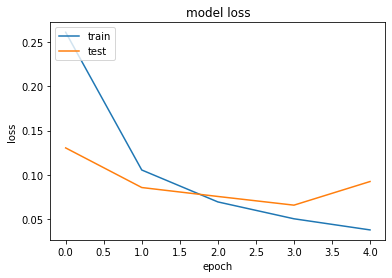

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using all activations
Now let's run the model with all the activations in the list and view the results in tensorboard


<font color=red><b> Let's do precisely that!
    <br> Hint: remember to add the tensorboard as a callback for the training.
    <br> Hint2: use the function os.path.join to include the activation name on each model call
    
</font>

In [7]:
from tensorflow.keras.callbacks import TensorBoard
epochs = 20
log_path = '/home/fer/data/formaciones/afi/tensorboard_log/activations_experiment2'
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    # build and compile the model
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
    tensorboard = TensorBoard(os.path.join(log_path,f'{activation}_{time.time()}'))
    # fit the model, adding the tensorboard to the callbacks
    model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3832 - accuracy: 0.8899 - val_loss: 0.3396 - val_accuracy: 0.9000
Epoch 2/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3086 - accuracy: 0.9131 - val_loss: 0.3294 - val_accuracy: 0.9027
Epoch 3/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2976 - accuracy: 0.9173 - val_loss: 0.2858 - val_accuracy: 0.9195
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2893 - accuracy: 0.9197 - val_loss: 0.3217 - val_accuracy: 0.9109
Epoch 5/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2825 - accuracy: 0.9215 - val_loss: 0.2789 - val_accuracy: 0.9210
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2798 - accuracy: 0.9217 - val_loss: 0.2977 - val_accuracy: 0.9140
Epoch 7/20
60000/60000 [==============================] 

Epoch 15/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0570 - val_accuracy: 0.9848
Epoch 16/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0721 - val_accuracy: 0.9806
Epoch 17/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0648 - val_accuracy: 0.9821
Epoch 18/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0684 - val_accuracy: 0.9812
Epoch 19/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0673 - val_accuracy: 0.9826
Epoch 20/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0644 - val_accuracy: 0.9828
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==========================